In [3]:
import torch
import torch.nn as nn
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import pandas as pd
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler

In [4]:
file_path = r'D:\project-rice-yield-prediction\datasets and notes\BD-rice(ok).xlsx'
df= pd.read_excel(file_path,sheet_name='Aman',skiprows=1)

In [5]:
df

,rice,year,district,weather district,division,yield,precip_1,precip_2,precip_5,precip_6,temp_1,temp_2,temp_5,temp_6
0,Aman,2006,Bagerhat,Khulna,Khulna,0.728570,16.838710,11.741935,0.033333,0.000000,28.9,28.7,24.1,20.2
1,Aman,2007,Bagerhat,Khulna,Khulna,0.522331,19.064516,5.161290,3.766667,0.000000,28.6,29.3,24.2,19.1
2,Aman,2008,Bagerhat,Khulna,Khulna,0.663455,9.709677,6.516129,0.000000,0.000000,28.5,29.0,24.1,20.6
3,Aman,2009,Bagerhat,Khulna,Khulna,0.769729,11.193548,18.322581,0.666667,0.000000,29.0,29.0,24.5,19.3
4,Aman,2010,Bagerhat,Khulna,Khulna,0.710355,5.806452,6.612903,0.000000,0.419355,29.6,29.7,25.1,19.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,Aman,2017,Thakurgaon,Dinajpur,Rangpur,1.138931,6.290323,21.129032,0.000000,0.000000,29.3,29.6,22.1,19.2
1319,Aman,2018,Thakurgaon,Dinajpur,Rangpur,1.159884,5.322581,5.290323,0.000000,0.322581,29.9,30.1,21.8,17.3
1320,Aman,2019,Thakurgaon,Dinajpur,Rangpur,1.170860,21.935484,10.580645,0.000000,0.000000,29.4,30.4,23.2,16.5
1321,Aman,2020,Thakurgaon,Dinajpur,Rangpur,1.083696,19.935484,10.258065,0.100000,0.000000,28.9,30.2,22.0,17.7


In [6]:
# Filter out the yield data
data = df[df['yield'].notnull()]

In [7]:
# Dropping the specified columns
data_dropped = data.drop(columns=['rice', 'weather district', 'division'])

# Display the remaining columns
print(data_dropped.columns)


Index(['year', 'district', 'yield', 'precip_1', 'precip_2', 'precip_5',
       'precip_6', 'temp_1', 'temp_2', 'temp_5', 'temp_6'],
      dtype='object')


In [8]:
df = pd.DataFrame(data_dropped)

# Workflow 1: Backward Padding for districts starting from 2006
# Filter districts starting from 2006
start_2006 = df[df['year'] >= 2006].groupby('district')

# Create missing rows for years 1993-2005 for each district starting in 2006
for district, group in start_2006:
    missing_years = pd.DataFrame({
        'district': [district] * (2006 - 1993),
        'year': list(range(1993, 2006)),
        'yield': [group['yield'].iloc[0]] * (2006 - 1993),  # Backward fill from 2006
        'precip_1': [group['precip_1'].iloc[0]] * (2006 - 1993),
        'precip_2': [group['precip_2'].iloc[0]] * (2006 - 1993),
        'precip_5': [group['precip_5'].iloc[0]] * (2006 - 1993),
        'precip_6': [group['precip_6'].iloc[0]] * (2006 - 1993),
        'temp_1': [group['temp_1'].iloc[0]] * (2006 - 1993),
        'temp_2': [group['temp_2'].iloc[0]] * (2006 - 1993),
        'temp_5': [group['temp_5'].iloc[0]] * (2006 - 1993),
        'temp_6': [group['temp_6'].iloc[0]] * (2006 - 1993)
    })
    # Append the missing years back to the original dataframe
    df = pd.concat([df, missing_years], ignore_index=True)

# Sort the dataframe by district and year for clear order
df = df.sort_values(by=['district', 'year']).reset_index(drop=True)


df.head()


,year,district,yield,precip_1,precip_2,precip_5,precip_6,temp_1,temp_2,temp_5,temp_6
0,1993,Bagerhat,0.72857,16.83871,11.741935,0.033333,0.0,28.9,28.7,24.1,20.2
1,1994,Bagerhat,0.72857,16.83871,11.741935,0.033333,0.0,28.9,28.7,24.1,20.2
2,1995,Bagerhat,0.72857,16.83871,11.741935,0.033333,0.0,28.9,28.7,24.1,20.2
3,1996,Bagerhat,0.72857,16.83871,11.741935,0.033333,0.0,28.9,28.7,24.1,20.2
4,1997,Bagerhat,0.72857,16.83871,11.741935,0.033333,0.0,28.9,28.7,24.1,20.2


In [9]:
# Set 'district' and 'year' as the index and keep the necessary columns
yield_data = df.set_index(['district', 'year'])[['yield','precip_1', 'precip_2', 'precip_5', 'precip_6', 
                                               'temp_1', 'temp_2', 'temp_5', 'temp_6',]]

# Display the reshaped DataFrame
yield_data.head()


yield  precip_1   precip_2  precip_5  precip_6  temp_1  \
district year                                                             
Bagerhat 1993  0.72857  16.83871  11.741935  0.033333       0.0    28.9   
         1994  0.72857  16.83871  11.741935  0.033333       0.0    28.9   
         1995  0.72857  16.83871  11.741935  0.033333       0.0    28.9   
         1996  0.72857  16.83871  11.741935  0.033333       0.0    28.9   
         1997  0.72857  16.83871  11.741935  0.033333       0.0    28.9   

               temp_2  temp_5  temp_6  
district year                          
Bagerhat 1993    28.7    24.1    20.2  
         1994    28.7    24.1    20.2  
         1995    28.7    24.1    20.2  
         1996    28.7    24.1    20.2  
         1997    28.7    24.1    20.2

In [10]:
yield_data.shape

(2155, 9)

In [11]:
# Group the data by 'district' and sum the 'yield' for each district
top_10_districts = pd.DataFrame(yield_data.groupby('district')['yield'].sum()).sort_values(by='yield', ascending=False).reset_index()

# Get the names of the top 10 districts
top_10_district_names = top_10_districts['district'][:10]
top_10_district_names


0    Khagrachari
1     Chittagong
2      Bandarban
3      Rangamati
4        Jessore
5        Kushtia
6        Rangpur
7       Rajshahi
8    Kishoregonj
9          Bogra
Name: district, dtype: object

In [12]:
top_10_districts.head(10)

,district,yield
0,Khagrachari,43.962612
1,Chittagong,43.670701
2,Bandarban,43.648252
3,Rangamati,43.468955
4,Jessore,40.656823
5,Kushtia,39.985933
6,Rangpur,39.574100
7,Rajshahi,39.392339
8,Kishoregonj,39.032074
9,Bogra,37.959269


In [13]:
# Normalize the data: Drop the target variable 'yield' and categorical columns
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(yield_data.drop(columns=['yield']))

# Create a DataFrame for the scaled data
scaled_df = pd.DataFrame(data=scaled, columns=yield_data.drop(columns=['yield']).columns)

In [14]:
# Check the normalized data
scaled_df.head()

,precip_1,precip_2,precip_5,precip_6,temp_1,temp_2,temp_5,temp_6
0,0.293917,0.245844,0.00274,0.0,0.617647,0.484848,0.681818,0.571429
1,0.293917,0.245844,0.00274,0.0,0.617647,0.484848,0.681818,0.571429
2,0.293917,0.245844,0.00274,0.0,0.617647,0.484848,0.681818,0.571429
3,0.293917,0.245844,0.00274,0.0,0.617647,0.484848,0.681818,0.571429
4,0.293917,0.245844,0.00274,0.0,0.617647,0.484848,0.681818,0.571429


In [15]:
# Create a copy of the original DataFrame
yield_data_scaled = yield_data.copy()

# Replace the relevant columns with the scaled values
yield_data_scaled[scaled_df.columns] = np.array(scaled_df)

# Set the index of the DataFrame to 'district' and 'year'
yield_data_scaled = yield_data_scaled.reset_index().set_index(['district', 'year'])

# Display the first few rows of the updated DataFrame
yield_data_scaled.head()


yield  precip_1  precip_2  precip_5  precip_6    temp_1  \
district year                                                              
Bagerhat 1993  0.72857  0.293917  0.245844   0.00274       0.0  0.617647   
         1994  0.72857  0.293917  0.245844   0.00274       0.0  0.617647   
         1995  0.72857  0.293917  0.245844   0.00274       0.0  0.617647   
         1996  0.72857  0.293917  0.245844   0.00274       0.0  0.617647   
         1997  0.72857  0.293917  0.245844   0.00274       0.0  0.617647   

                 temp_2    temp_5    temp_6  
district year                                
Bagerhat 1993  0.484848  0.681818  0.571429  
         1994  0.484848  0.681818  0.571429  
         1995  0.484848  0.681818  0.571429  
         1996  0.484848  0.681818  0.571429  
         1997  0.484848  0.681818  0.571429

In [20]:

# Function to split the data into train and test sets
def train_test_split(data):
    # Calculate the size of the training set (80% of the data)
    size = int(len(data) * 0.8)

    # For train data, collect 80% of the data, dropping the target variable 'yield'
    x_train = data.drop(columns=['yield']).iloc[0:size].values.astype('float32')
    
    # For test data, collect the remaining 20% of the data
    x_test = data.drop(columns=['yield']).iloc[size:].values.astype('float32')
    

    # Define the target variable for training and testing
    y_train = data['yield'].iloc[0:size].values.astype('float32')
    y_test = data['yield'].iloc[size:].values.astype('float32')

    # Convert the numpy arrays to PyTorch tensors
    x_train_tensor = torch.tensor(x_train)
    x_test_tensor = torch.tensor(x_test)
    y_train_tensor = torch.tensor(y_train)
    y_test_tensor = torch.tensor(y_test)

    return x_train_tensor, x_test_tensor, y_train_tensor, y_test_tensor




In [17]:
yield_data_scaled.shape

(2155, 9)

# from here some variation start :now trail

In [21]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is a pandas DataFrame
def train_test_split_pytorch(data, test_size=0.2):
    # Calculate the size of the training set (80% of the data)
    size = int(len(data) * (1 - test_size))
    
    # For train data, collect 80% of the data, dropping the target variable 'yield'
    x_train = data.drop(columns=['yield']).iloc[:size].values
    x_test = data.drop(columns=['yield']).iloc[size:].values
    year_train = data['year'].iloc[:size].values
    year_test = data['year'].iloc[size:].values
    
    # Define the target variable for training and testing
    y_train = data['yield'].iloc[:size].values
    y_test = data['yield'].iloc[size:].values
    
    # Convert to PyTorch tensors
    x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
    x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32)
    
    return x_train_tensor, x_test_tensor, y_train_tensor, y_test_tensor

# Example usage:



In [33]:
x_test

tensor([[0.2420, 0.0315, 0.0000, 0.0570, 0.6471, 0.9697, 0.5227, 0.3377],
        [0.0704, 0.5004, 0.0000, 0.0000, 0.7353, 0.7576, 0.4545, 0.4416],
        [0.0499, 0.0709, 0.0000, 0.0518, 0.9118, 0.9091, 0.4205, 0.1948],
        [0.4019, 0.2143, 0.0000, 0.0000, 0.7647, 1.0000, 0.5795, 0.0909],
        [0.3595, 0.2056, 0.0082, 0.0000, 0.6176, 0.9394, 0.4432, 0.2468],
        [0.0602, 0.2835, 0.0000, 0.0259, 0.9118, 0.6364, 0.4545, 0.4026]])

In [24]:
yield_data_scaled.shape

(2155, 9)

In [25]:
import torch
import pandas as pd

# Assuming `yield_data_scaled` is a MultiIndex DataFrame (district, year)
districts = yield_data_scaled.index.levels[0]  # Get the unique districts from the first level of the index

# Initialize empty lists for training and testing data
X_train_list = []
X_test_list = []
Y_train_list = []
Y_test_list = []

# Define the data splitting function for PyTorch (as provided earlier)
def train_test_split_pytorch(data, test_size=0.2):
    # Calculate the size of the training set (80% of the data)
    size = int(len(data) * (1 - test_size))
    
    # For train data, collect 80% of the data, dropping the target variable 'yield'
    x_train = data.drop(columns=['yield']).iloc[:size].values
    x_test = data.drop(columns=['yield']).iloc[size:].values
    
    # Define the target variable for training and testing
    y_train = data['yield'].iloc[:size].values
    y_test = data['yield'].iloc[size:].values
    
    # Convert to PyTorch tensors
    x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
    x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32)
    
    return x_train_tensor, x_test_tensor, y_train_tensor, y_test_tensor

# Loop through the unique districts and split the data
for district in districts:
    # Get data for the current district
    data = yield_data_scaled.xs(district, level='district')  
    
    # Reset the index and add the district back
    data_reset = data.reset_index()  # 'year' becomes a column
    data_reset['district'] = district  # Add district as a column
    data_reset = data_reset.set_index(['district', 'year'])  # Set the index back to district and year

    # Apply the function to split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split_pytorch(data_reset)
    
    # Append the results to the respective lists
    X_train_list.append(x_train)
    X_test_list.append(x_test)
    Y_train_list.append(y_train)
    Y_test_list.append(y_test)

# Optionally, you can concatenate all districts' data into one dataset if needed
X_train = torch.cat(X_train_list, dim=0)
X_test = torch.cat(X_test_list, dim=0)
Y_train = torch.cat(Y_train_list, dim=0)
Y_test = torch.cat(Y_test_list, dim=0)

# Now X_train, X_test, Y_train, and Y_test are ready to be used for LSTM in PyTorch


In [26]:
import torch

# Concatenate each train dataset in X_train list and Y_train list respectively
X_train_tensor = torch.cat(X_train_list, dim=0)  # Concatenate along dimension 0 (rows)
Y_train_tensor = torch.cat(Y_train_list, dim=0).unsqueeze(1)  # Unsqueeze to make it 2D

# Concatenate each test dataset in X_test list and Y_test list respectively
X_test_tensor = torch.cat(X_test_list, dim=0)  # Concatenate along dimension 0 (rows)
Y_test_tensor = torch.cat(Y_test_list, dim=0).unsqueeze(1)  # Unsqueeze to make it 2D

# Now X_train_tensor, Y_train_tensor, X_test_tensor, and Y_test_tensor are ready to be used in PyTorch LSTM


In [34]:
X_train_tensor

tensor([[0.2939, 0.2458, 0.0027,  ..., 0.4848, 0.6818, 0.5714],
        [0.2939, 0.2458, 0.0027,  ..., 0.4848, 0.6818, 0.5714],
        [0.2939, 0.2458, 0.0027,  ..., 0.4848, 0.6818, 0.5714],
        ...,
        [0.1114, 0.3377, 0.0000,  ..., 0.5455, 0.3750, 0.2338],
        [0.1374, 0.0857, 0.0000,  ..., 0.6364, 0.4205, 0.1688],
        [0.1613, 0.4436, 0.0000,  ..., 0.5758, 0.5227, 0.1688]])

In [28]:
import torch
import pandas as pd

# Function to split the data into train and test sets
def train_test_split_pytorch(data, split_ratio=0.8):
    # Calculate the size of the training set (80% of the data)
    size = int(len(data) * split_ratio)

    # For train data, collect 80% of the data, dropping the target variable 'yield'
    x_train = data.drop(columns=['yield']).iloc[0:size].values
    x_train_tensor = torch.tensor(x_train, dtype=torch.float32)

    # For test data, collect the remaining 20% of the data
    x_test = data.drop(columns=['yield']).iloc[size:].values
    x_test_tensor = torch.tensor(x_test, dtype=torch.float32)

    # Define the target variable for training and testing
    y_train = data['yield'].iloc[0:size].values
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

    y_test = data['yield'].iloc[size:].values
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

    return x_train_tensor, x_test_tensor, y_train_tensor, y_test_tensor


# Initialize empty lists for training and testing data
X_train_list = []
X_test_list = []
Y_train_list = []
Y_test_list = []

# Get unique districts
districts = yield_data_scaled.index.levels[0]  # Get the unique districts from the first level of the index

for district in districts:
    data = yield_data_scaled.xs(district, level='district')  # Get data for the current district
    
    # Optionally, reset the index and add the district back
    data_reset = data.reset_index()  # This will make 'year' a column
    data_reset['district'] = district  # Add the district back as a column
    data_reset = data_reset.set_index(['district', 'year'])  # Set the index back to district and year

    # Apply the PyTorch version of the train_test_split function
    x_train_tensor, x_test_tensor, y_train_tensor, y_test_tensor = train_test_split_pytorch(data_reset) 
    
    X_train_list.append(x_train_tensor)
    X_test_list.append(x_test_tensor)
    Y_train_list.append(y_train_tensor)
    Y_test_list.append(y_test_tensor)

# Concatenate each train dataset in X_train list and Y_train list respectively 
X_train_tensor = torch.cat(X_train_list, dim=0)
Y_train_tensor = torch.cat(Y_train_list, dim=0)

# Concatenate each test dataset in X_test list and Y_test list respectively
X_test_tensor = torch.cat(X_test_list, dim=0)
Y_test_tensor = torch.cat(Y_test_list, dim=0)

# Double check the shape of the train and test data
print(X_train_tensor.shape)
print(Y_train_tensor.shape)
print(X_test_tensor.shape)
print(Y_test_tensor.shape)


torch.Size([1702, 8])
torch.Size([1702, 1])
torch.Size([453, 8])
torch.Size([453, 1])


In [29]:
X_train_tensor

tensor([[0.2939, 0.2458, 0.0027,  ..., 0.4848, 0.6818, 0.5714],
        [0.2939, 0.2458, 0.0027,  ..., 0.4848, 0.6818, 0.5714],
        [0.2939, 0.2458, 0.0027,  ..., 0.4848, 0.6818, 0.5714],
        ...,
        [0.1114, 0.3377, 0.0000,  ..., 0.5455, 0.3750, 0.2338],
        [0.1374, 0.0857, 0.0000,  ..., 0.6364, 0.4205, 0.1688],
        [0.1613, 0.4436, 0.0000,  ..., 0.5758, 0.5227, 0.1688]])

In [30]:
import torch
import pandas as pd

# Function to split the data into train and test sets
def train_test_split_pytorch(data, split_ratio=0.8):
    # Calculate the size of the training set (80% of the data)
    size = int(len(data) * split_ratio)

    # Ensure that all data is in numeric format
    data = data.apply(pd.to_numeric, errors='coerce')

    # For train data, collect 80% of the data, dropping the target variable 'yield'
    x_train = data.drop(columns=['yield']).iloc[0:size].values
    x_train_tensor = torch.tensor(x_train, dtype=torch.float32)

    # For test data, collect the remaining 20% of the data
    x_test = data.drop(columns=['yield']).iloc[size:].values
    x_test_tensor = torch.tensor(x_test, dtype=torch.float32)

    # Define the target variable for training and testing
    y_train = data['yield'].iloc[0:size].values
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

    y_test = data['yield'].iloc[size:].values
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

    return x_train_tensor, x_test_tensor, y_train_tensor, y_test_tensor




In [31]:
# Initialize empty lists for training and testing data
X_train_list = []
X_test_list = []
Y_train_list = []
Y_test_list = []

# Get unique districts
districts = yield_data_scaled.index.levels[0]  # Get the unique districts from the first level of the index

for district in districts:
    data = yield_data_scaled.xs(district, level='district')  # Get data for the current district
    
    # Optionally, reset the index and add the district back
    data_reset = data.reset_index()  # This will make 'year' a column
    data_reset['district'] = district  # Add the district back as a column
    data_reset = data_reset.set_index(['district', 'year'])  # Set the index back to district and year

    # Apply the PyTorch version of the train_test_split function
    x_train_tensor, x_test_tensor, y_train_tensor, y_test_tensor = train_test_split_pytorch(data_reset) 
    
    X_train_list.append(x_train_tensor)
    X_test_list.append(x_test_tensor)
    Y_train_list.append(y_train_tensor)
    Y_test_list.append(y_test_tensor)

# Concatenate each train dataset in X_train list and Y_train list respectively 
X_train_tensor = torch.cat(X_train_list, dim=0)
Y_train_tensor = torch.cat(Y_train_list, dim=0)

# Concatenate each test dataset in X_test list and Y_test list respectively
X_test_tensor = torch.cat(X_test_list, dim=0)
Y_test_tensor = torch.cat(Y_test_list, dim=0)


In [32]:


# Double check the shape of the train and test data
print(X_train_tensor.shape)
print(Y_train_tensor.shape)
print(X_test_tensor.shape)
print(Y_test_tensor.shape)

torch.Size([1702, 8])
torch.Size([1702, 1])
torch.Size([453, 8])
torch.Size([453, 1])


# Data Preprocessing

In [35]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np

# Function to convert series to supervised learning
def series_to_supervised_pytorch(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = [], []
    
    # input sequence (t-n, ..., t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    # forecast sequence (t, t+1, ..., t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    
    # concatenate everything
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    
    # drop NaN values
    if dropnan:
        agg.dropna(inplace=True)
    
    return agg

# Function to reshape data into 3D format for LSTM
def reshape_data_pytorch(train, test):
    # Convert to supervised learning format
    reframed_train = series_to_supervised_pytorch(train, 1, 1)
    reframed_test = series_to_supervised_pytorch(test, 1, 1)
    
    # Convert to numpy arrays
    train_values = reframed_train.values
    test_values = reframed_test.values
    
    # Split into input (X) and output (y) for training and testing
    train_X, y_train = train_values[:, :-1], train_values[:, -1]
    test_X, y_test = test_values[:, :-1], test_values[:, -1]
    
    # Reshape input to be 3D [samples, timesteps, features]
    x_train = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    x_test = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    
    # Convert to PyTorch tensors
    x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
    x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)
    
    return x_train_tensor, x_test_tensor, y_train_tensor, y_test_tensor


# Combine X_train and Y_train as train data
train_data = pd.DataFrame(X_train.numpy())  # Convert tensor to DataFrame
train_data['yield'] = Y_train.numpy()  # Convert tensor to numpy array for the target

# Combine X_test and Y_test as test data
test_data = pd.DataFrame(X_test.numpy())  # Convert tensor to DataFrame
test_data['yield'] = Y_test.numpy()  # Convert tensor to numpy array for the target

# Using the function to obtain reshaped x_train, x_test, y_train, y_test
x_train_tensor, x_test_tensor, y_train_tensor, y_test_tensor = reshape_data_pytorch(train_data, test_data)


# Define LSTM Model in PyTorch
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Get output of the last time step
        return out


# Instantiate model
input_size = x_train_tensor.shape[2]
hidden_size = 60
output_size = 1
model = LSTMModel(input_size, hidden_size, output_size)

# Loss and optimizer
criterion = nn.L1Loss()  # equivalent to MAE in Keras
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


# Train the model
num_epochs = 30
batch_size = 50
train_dataset = torch.utils.data.TensorDataset(x_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=False)

for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 1   == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Test the model
model.eval()
with torch.no_grad():
    test_outputs = model(x_test_tensor)
    test_loss = criterion(test_outputs, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')


Epoch [1/30], Loss: 0.5157
Epoch [2/30], Loss: 0.1083
Epoch [3/30], Loss: 0.1263
Epoch [4/30], Loss: 0.1241
Epoch [5/30], Loss: 0.1197
Epoch [6/30], Loss: 0.1110
Epoch [7/30], Loss: 0.1146
Epoch [8/30], Loss: 0.1107
Epoch [9/30], Loss: 0.1070
Epoch [10/30], Loss: 0.0981
Epoch [11/30], Loss: 0.0991
Epoch [12/30], Loss: 0.0961
Epoch [13/30], Loss: 0.0837
Epoch [14/30], Loss: 0.0784
Epoch [15/30], Loss: 0.0697
Epoch [16/30], Loss: 0.0625
Epoch [17/30], Loss: 0.0628
Epoch [18/30], Loss: 0.0586
Epoch [19/30], Loss: 0.0546
Epoch [20/30], Loss: 0.0514
Epoch [21/30], Loss: 0.0476
Epoch [22/30], Loss: 0.0513
Epoch [23/30], Loss: 0.0539
Epoch [24/30], Loss: 0.0603
Epoch [25/30], Loss: 0.0596
Epoch [26/30], Loss: 0.0587
Epoch [27/30], Loss: 0.0649
Epoch [28/30], Loss: 0.0549
Epoch [29/30], Loss: 0.0515
Epoch [30/30], Loss: 0.0602
Test Loss: 0.1624


Epoch [5/30], Loss: 0.0724
Epoch [10/30], Loss: 0.0710
Epoch [15/30], Loss: 0.0705
Epoch [20/30], Loss: 0.0697
Epoch [25/30], Loss: 0.0689
Epoch [30/30], Loss: 0.0700


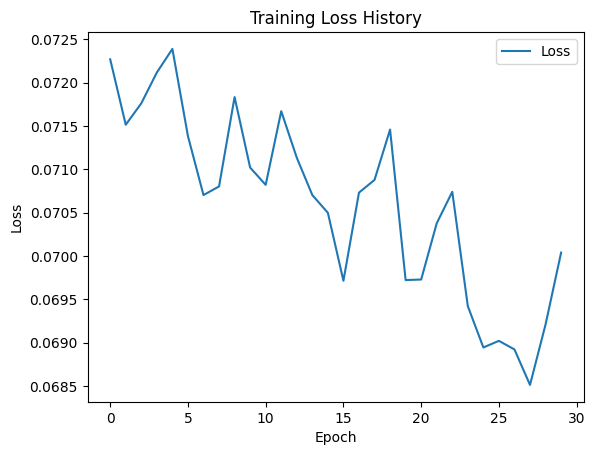

In [36]:
import matplotlib.pyplot as plt

# Initialize a list to store loss values
loss_history = []

# Train the model
num_epochs = 30
batch_size = 50
train_dataset = torch.utils.data.TensorDataset(x_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=False)

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for inputs, labels in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()  # Accumulate the loss

    # Store the average loss for the epoch
    avg_epoch_loss = epoch_loss / len(train_loader)
    loss_history.append(avg_epoch_loss)

    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}')

# Plot the training loss history
plt.plot(loss_history, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss History')
plt.legend()
plt.show()


# Data prepossesing : here adjusted many thing based on my data that will be fit

In [37]:
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt

# Function to convert series to supervised learning
def series_to_supervised_pytorch(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = [], []
    
    # Input sequence (t-n, ..., t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    # Forecast sequence (t, t+1, ..., t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    
    # Concatenate everything
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    
    # Drop NaN values
    if dropnan:
        agg.dropna(inplace=True)
    
    return agg

# Function to reshape data into 3D format for LSTM
def reshape_data_pytorch(train, test):
    reframed_train = series_to_supervised_pytorch(train, 1, 1)
    reframed_test = series_to_supervised_pytorch(test, 1, 1)
    
    # Convert to numpy arrays
    train_values = reframed_train.values
    test_values = reframed_test.values
    
    # Split into input (X) and output (y) for training and testing
    train_X, y_train = train_values[:, :-1], train_values[:, -1]
    test_X, y_test = test_values[:, :-1], test_values[:, -1]
    
    # Reshape input to be 3D [samples, timesteps, features]
    x_train = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    x_test = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    
    # Convert to PyTorch tensors
    x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
    x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)
    
    return x_train_tensor, x_test_tensor, y_train_tensor, y_test_tensor

# Combine X_train and Y_train as train data
train_data = pd.DataFrame(X_train.numpy())  # Convert tensor to DataFrame
train_data['yield'] = Y_train.numpy()  # Convert tensor to numpy array for the target

# Combine X_test and Y_test as test data
test_data = pd.DataFrame(X_test.numpy())  # Convert tensor to DataFrame
test_data['yield'] = Y_test.numpy()  # Convert tensor to numpy array for the target

# Using the function to obtain reshaped x_train, x_test, y_train, y_test
x_train_tensor, x_test_tensor, y_train_tensor, y_test_tensor = reshape_data_pytorch(train_data, test_data)

# Define LSTM Model in PyTorch
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Get output of the last time step
        return out

# Instantiate model with adjusted parameters
input_size = x_train_tensor.shape[2]
hidden_size = 100  # Adjusted hidden size
output_size = 1
model = LSTMModel(input_size, hidden_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()  # Switched to MSE Loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Default learning rate

# Train the model
num_epochs = 100  # Increased number of epochs
batch_size = 64  # Adjusted batch size
train_dataset = torch.utils.data.TensorDataset(x_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)  # Shuffle for better generalization


for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) %  1  == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Test the model
model.eval()
with torch.no_grad():
    test_outputs = model(x_test_tensor)
    test_loss = criterion(test_outputs, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

Epoch [1/100], Loss: 0.1912
Epoch [2/100], Loss: 0.0193
Epoch [3/100], Loss: 0.0327
Epoch [4/100], Loss: 0.0207
Epoch [5/100], Loss: 0.0112
Epoch [6/100], Loss: 0.0137
Epoch [7/100], Loss: 0.0102
Epoch [8/100], Loss: 0.0407
Epoch [9/100], Loss: 0.0124
Epoch [10/100], Loss: 0.0160
Epoch [11/100], Loss: 0.0445
Epoch [12/100], Loss: 0.0479
Epoch [13/100], Loss: 0.0075
Epoch [14/100], Loss: 0.0188
Epoch [15/100], Loss: 0.0064
Epoch [16/100], Loss: 0.0208
Epoch [17/100], Loss: 0.0109
Epoch [18/100], Loss: 0.0114
Epoch [19/100], Loss: 0.0116
Epoch [20/100], Loss: 0.0480
Epoch [21/100], Loss: 0.0228
Epoch [22/100], Loss: 0.0111
Epoch [23/100], Loss: 0.0077
Epoch [24/100], Loss: 0.0050
Epoch [25/100], Loss: 0.0173
Epoch [26/100], Loss: 0.0054
Epoch [27/100], Loss: 0.0152
Epoch [28/100], Loss: 0.0575
Epoch [29/100], Loss: 0.0057
Epoch [30/100], Loss: 0.0076
Epoch [31/100], Loss: 0.0236
Epoch [32/100], Loss: 0.0555
Epoch [33/100], Loss: 0.0019
Epoch [34/100], Loss: 0.0036
Epoch [35/100], Loss: 0

# Testing and Visualization

Epoch [10/100], Loss: 0.0111
Epoch [20/100], Loss: 0.0110
Epoch [30/100], Loss: 0.0110
Epoch [40/100], Loss: 0.0111
Epoch [50/100], Loss: 0.0113
Epoch [60/100], Loss: 0.0108
Epoch [70/100], Loss: 0.0105
Epoch [80/100], Loss: 0.0103
Epoch [90/100], Loss: 0.0106
Epoch [100/100], Loss: 0.0103
Test Loss: 0.3222


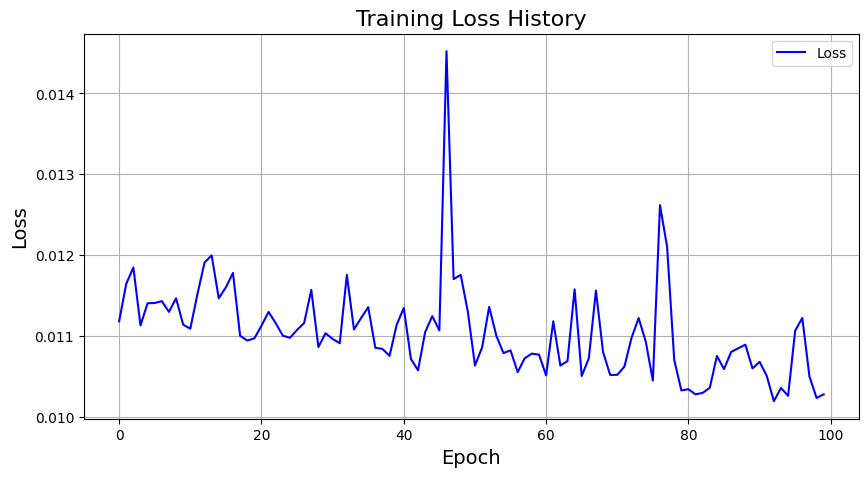

In [38]:
# Initialize a list to store loss values
loss_history = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for inputs, labels in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()

    # Store the average loss for the epoch
    avg_epoch_loss = epoch_loss / len(train_loader)
    loss_history.append(avg_epoch_loss)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}')

# Test the model
model.eval()
with torch.no_grad():
    test_outputs = model(x_test_tensor)
    test_loss = criterion(test_outputs, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

# Separate plotting code
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Loss', color='blue')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Training Loss History', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

Epoch [10/100], Loss: 0.0103
Epoch [20/100], Loss: 0.0100
Epoch [30/100], Loss: 0.0100
Epoch [40/100], Loss: 0.0101
Epoch [50/100], Loss: 0.0101
Epoch [60/100], Loss: 0.0101
Epoch [70/100], Loss: 0.0103
Epoch [80/100], Loss: 0.0101
Epoch [90/100], Loss: 0.0098
Epoch [100/100], Loss: 0.0098
Test Loss: 0.3208


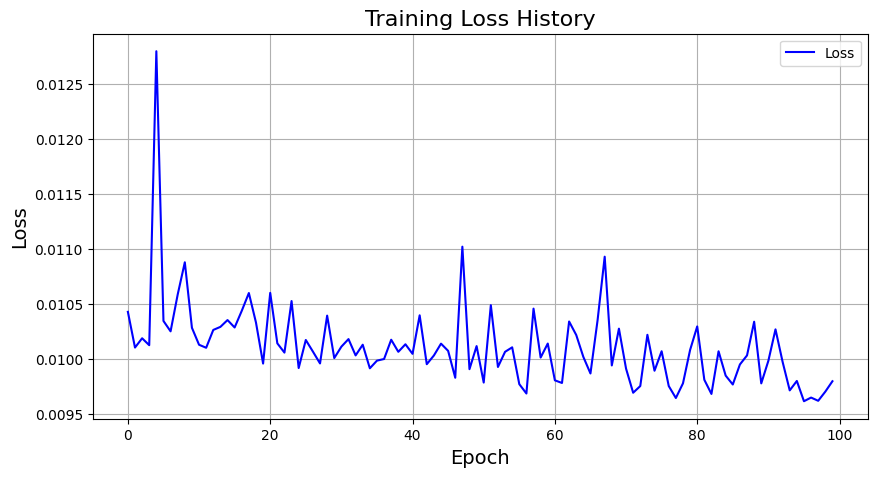

In [39]:
# Initialize a list to store loss values
loss_history = []

# Train the model
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for inputs, labels in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    # Average loss for the epoch
    avg_loss = epoch_loss / len(train_loader)
    loss_history.append(avg_loss)

    if (epoch + 1) % 10 == 0:  # Print loss every 10 epochs
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}')

# Test the model
model.eval()
with torch.no_grad():
    test_outputs = model(x_test_tensor)
    test_loss = criterion(test_outputs, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

# Plot the loss history
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Loss', color='blue')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Training Loss History', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()


# Model prediction

In [41]:
# Make a prediction
model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Disable gradient computation for efficiency
    y_test_pre_tensor = model(x_test_tensor)  # Get predictions from the model

# Convert predictions to NumPy array for shape checking
y_test_pre = y_test_pre_tensor.numpy()



In [42]:

# Check length (shape)
print("Predicted shape:", y_test_pre.shape)
print("Actual shape:", y_test_tensor.numpy().shape)

Predicted shape: (452, 1)
Actual shape: (452, 1)


# Model Evaluation

In [44]:
print("Column names:", X_test.columns)

AttributeError: 'Tensor' object has no attribute 'columns'

In [43]:
import pandas as pd
import torch

# Convert the tensor to a DataFrame before resetting the index

# Create the DataFrame 'pa'
pa = pd.DataFrame()

# Use the 'year_df' directly
#pa['year'] = year_df['year'].iloc[1:-1].values  # Adjusting for index range

# Use list comprehension for predictions and adjust for indexing
pa['Prediction'] = [i[0] for i in y_test_pre][1:]

# Use the actual values from y_test_tensor, converted to NumPy
pa['Actual Values'] = y_test_tensor.numpy()[:-1]

# Show the first few rows of the DataFrame
print(pa.head())


   Prediction  Actual Values
0    0.754775       0.725680
1    0.422598       0.683724
2    0.852397       0.817027
3    0.708869       0.851027
4    0.667488       0.894754


In [2]:
pa=pd.DataFrame()
pa['year']=X_test_tensor.reset_index().year.iloc[1:-1]
pa['Prediction']=[i[0] for i in y_test_pre][1:] 
pa['Actual Values']=y_test_tensor.numpy()[:-1]
pa.head()

NameError: name 'pd' is not defined

In [96]:

# Assuming 'pa' is your DataFrame
actual_values = pa['Actual Values']
print(actual_values)


0      0.725680
1      0.683724
2      0.817027
3      0.851027
4      0.894754
         ...   
446    1.148528
447    1.138931
448    1.159884
449    1.170860
450    1.083696
Name: Actual Values, Length: 451, dtype: float32


In [98]:
# Print the Prediction column
prediction = pa['Prediction']

print(prediction)


0      0.762763
1      0.505278
2      0.884001
3      0.785676
4      0.698146
         ...   
446    1.091931
447    1.114888
448    1.231664
449    1.159995
450    0.969797
Name: Prediction, Length: 451, dtype: float32


In [99]:
plt.figure(figsize=(20,10))
pa.groupby('year')['Prediction'].sum().plot(kind='line',label='prediction',color='red',alpha=1)
pa.groupby("year")['Actual Values'].sum().plot(kind='line',label='actual values',color='blue',alpha=0.4)
plt.xticks(rotation=90,size=20)
plt.yticks(size=20)

plt.ylabel('Yield',fontsize=20)
plt.xlabel('year',fontsize=20)
plt.title('Predicted Values VS Acutal Values - Rice Yield',fontsize=20)
plt.legend()

KeyError: 'year'

<Figure size 2000x1000 with 0 Axes>